<a href="https://colab.research.google.com/github/crna18/Analise_Plano_de_Saude/blob/main/Projeto_Plano_de_Sa%C3%BAde_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objetivo:

Simular uma situação real, a fim de ajudar o time comercial de uma operadora de saúde que está preocupado com o custo de um grande contrato que está fechando.

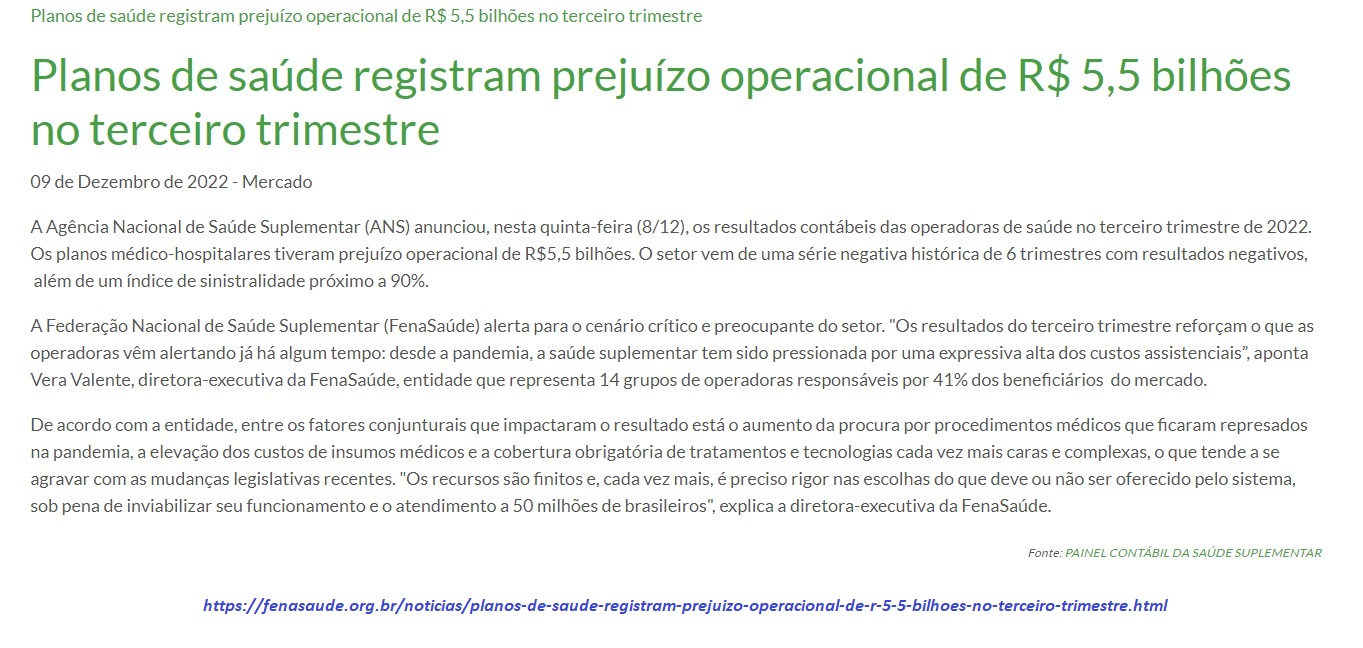

## Solução:

Podemos treinar um modelo de ML com os dados de diversos usuários da operadora e tentar prever quanto será gasto com esse novo negócio.

Podemos submeter toda a lista dos novos funcionários e descobrir quanto cada um irá gastar ao longo do ano.

Assim somos preventivos e ajudamos a controlar o orçamento ( custo x receita ), evitando assim prejuízo para a operadora no final.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Leitura dos dados
Base_Dados = pd.read_csv('Base_Dados_Plano_Saude.csv')

Base_Dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Conhecendo os dados de forma macro

In [ ]:
# Dimensão
Base_Dados.shape

(1338, 7)

In [ ]:
# Tipo de dados
Base_Dados.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# Geral
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Calculando campos nulos
Base_Dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

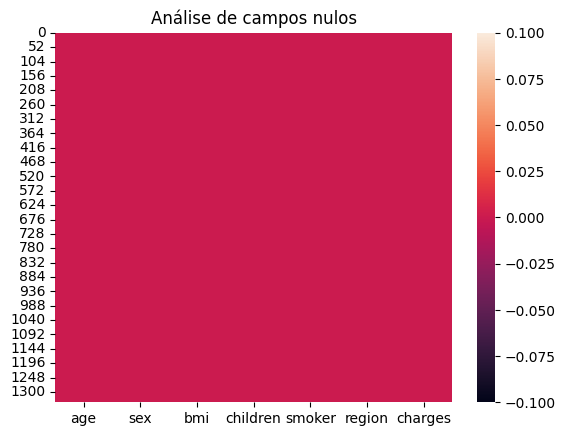

In [ ]:
# Visualização campos nulos
plt.title('Análise de campos nulos')
sns.heatmap( Base_Dados.isnull() );

In [ ]:
! pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from colorama import Style, Fore

print(f'{Style.BRIGHT} {Fore.YELLOW} Estatística Descritiva {Style.RESET_ALL}')
Base_Dados.describe(include = 'all')

  Estatística Descritiva 


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Análise Exploratória

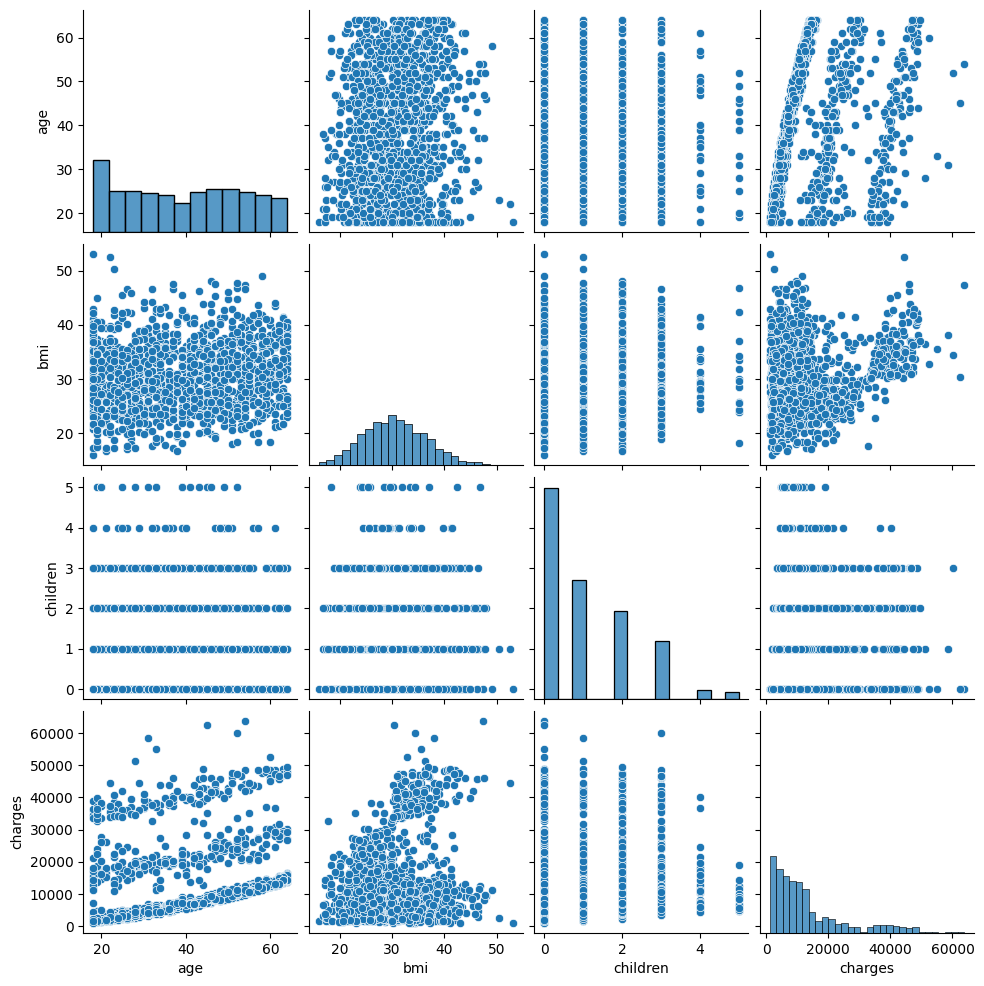

In [ ]:
# Plot Geral
sns.pairplot( Base_Dados );

Temos acima um panorama de todas as variáveis núméricas gerando vários gráficos e comparando toda a base de dados, como:

1- Comparando "charges" (custo) com "age" (idade), analisamos que as pessoas com maior idade acabam gastando mais do que pessoas com menor idade (gráfico de dispersão);

2- Comparando "charges" x "charges", vemos que a maior quantidade dos dados está no custo abaixo dos R$ 20.000,00 (gráfico histograma).



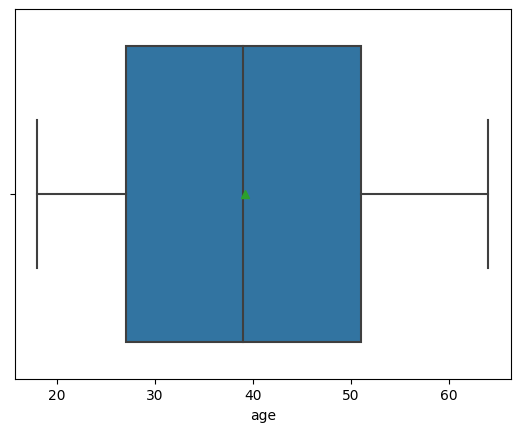

In [ ]:
# Análise da idade

# Boxplot
sns.boxplot ( x=Base_Dados['age'], showmeans=True );

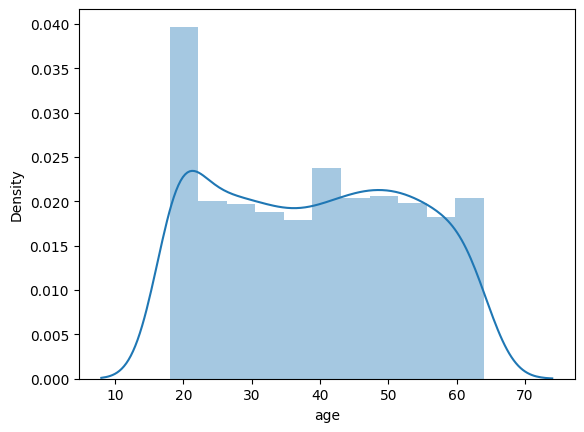

In [ ]:
# Histograma
sns.distplot( Base_Dados['age'] );

In [ ]:
# Estatística Descritiva
Base_Dados['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

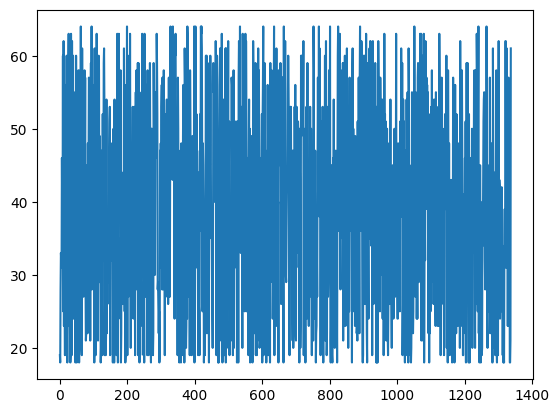

In [ ]:
# Análise da Série (fará mais sentido à frente)
plt.plot(Base_Dados['age'].values );

In [ ]:
# Colunas
Base_Dados.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

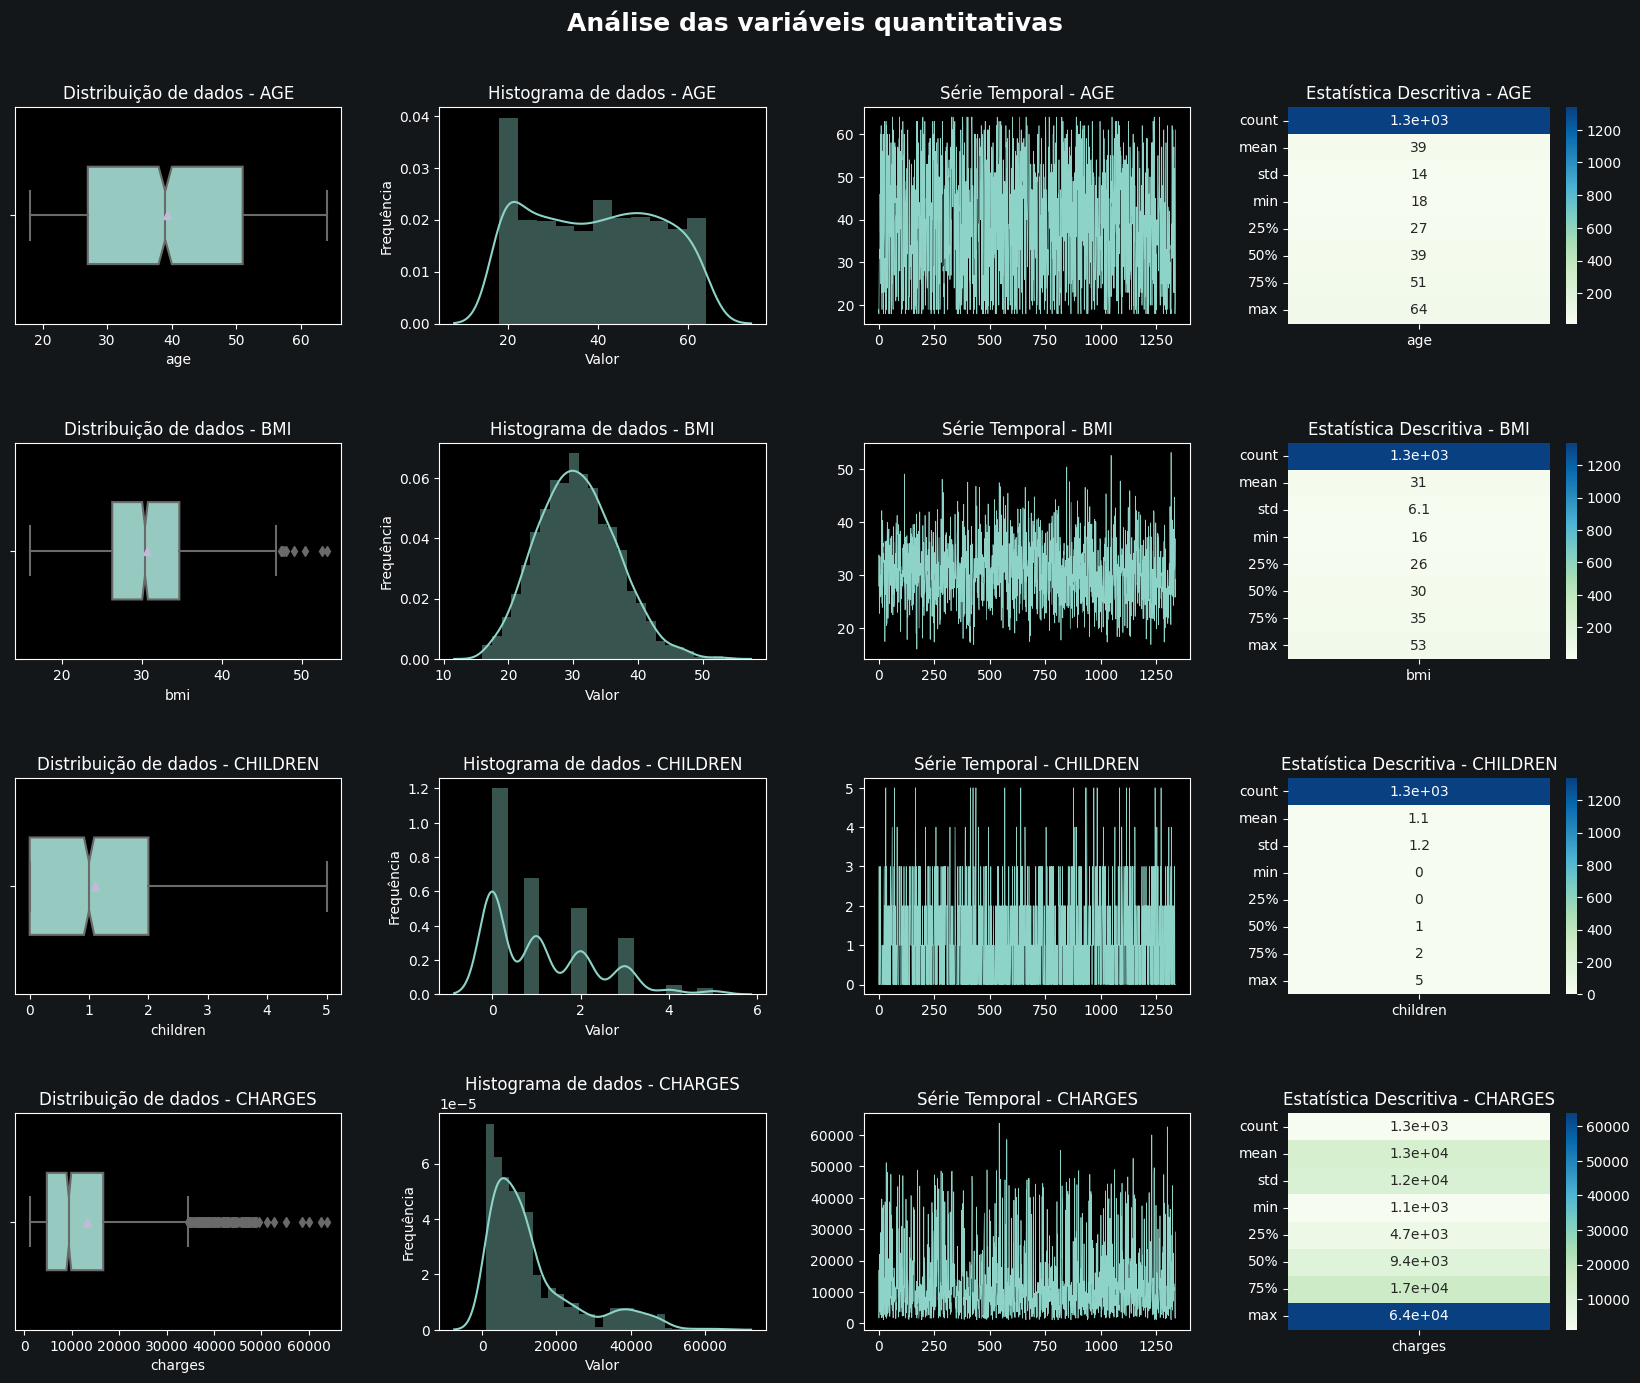

In [ ]:
# VARIÁVEIS QUANTITATIVAS

# Grid de gráficos
Quantidade_Graficos = 4
Colunas = 4
Loop_Repeticao = 1

# Ajuste do relatório
Figura = plt.figure( figsize=(20, 15) )
Cor_Fundo = '#14171a'
Figura.set_facecolor(Cor_Fundo)

# Estilo
plt.style.use('dark_background')

# Título principal
plt.suptitle(f'Análise das variáveis quantitativas', fontsize=18, color='#ffffff', fontweight=600 )

# Loop usando Index e Nome da coluna
for Index, Coluna in zip( Base_Dados.dtypes.index, Base_Dados.dtypes.values ):

  # Apenas se for numérico
  if Coluna != object:

    # Boxplot
    plt.subplot(Quantidade_Graficos, Colunas, Loop_Repeticao )
    plt.title(f'Distribuição de dados - {Index.upper()}')
    sns.boxplot( x=Base_Dados[Index], width=0.45, notch=True, showmeans=True )
    Loop_Repeticao += 1

    # Distplot
    plt.subplot(Quantidade_Graficos, Colunas, Loop_Repeticao )
    sns.distplot( Base_Dados[Index] )
    plt.title(f'Histograma de dados - {Index.upper()}')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    Loop_Repeticao += 1

    # Série
    plt.subplot(Quantidade_Graficos, Colunas, Loop_Repeticao )
    plt.title(f'Série Temporal - {Index.upper()}')
    plt.plot( Base_Dados[Index].values, linewidth=0.5 )
    Loop_Repeticao += 1

    # Estatística
    plt.subplot(Quantidade_Graficos, Colunas, Loop_Repeticao )
    plt.title(f'Estatística Descritiva - {Index.upper()}')
    sns.heatmap( pd.DataFrame( Base_Dados[Index].describe() ), annot=True, cmap="GnBu")
    Loop_Repeticao += 1

    plt.subplots_adjust( left=0.1, bottom=0.1, right=0.9, top=0.915, wspace=0.3, hspace=0.55 );